In [1]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision', 3)
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import binom, beta

In [3]:
# population parameter
p = 0.3
# generate toy sample
N = 15
np.random.seed(101)
data = binom.rvs(1,p, size=N)
print(data)
print(data.size)
print(data.sum())

[0 0 0 0 0 1 0 1 1 0 0 0 0 1 1]
15
5


seed 심어줌 (랜덤 추출 지정)
이항분포 모수 p=0.3, n=15(회) 지정
data = binom.rvs(1,p, size=N) <- 이항 확률변수 of 성공=1, p=0.3, N=15
data, data 크기(갯수), 데이터 값(X)의 합

Text(0, 0.5, 'p(theta)')

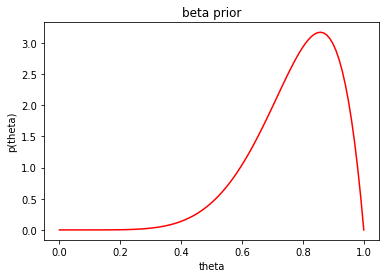

In [4]:
# choose your belief parameter
a= 7; b= 2

prior = beta(a, b)
theta = np.linspace(0,1,100)
plt.plot(theta, prior.pdf(theta), color='r')
plt.title('beta prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

우리가 예상(믿는) 분포와 모수 지정 / beta(a,b) 따르기로 / 세타의 범위 지정 / plt.plot <- matplot 패키지에서 그림 출력하는 코드 / 대상: prior 분포(베타)의 pdf of theta (= P(theta))

(0, 1)

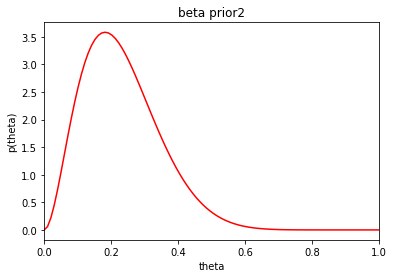

In [5]:
# you can always reflect other belief by tweaking your parameter;
a2= 3; b2= 10

prior2 = beta(a2, b2)
theta = np.linspace(0,1,100)
plt.plot(theta,prior2.pdf(theta), color='r')
plt.title('beta prior2')
plt.xlabel('theta')
plt.ylabel('p(theta)')
plt.xlim(0,1)

Text(0, 0.5, 'p(theta)')

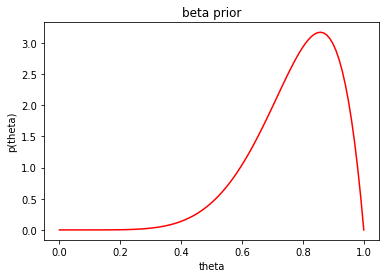

In [6]:
a= 7; b= 2

prior = beta(a, b)
theta = np.linspace(0,1,100)
plt.plot(theta, prior.pdf(theta), color='r')
plt.title('beta prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

plot의 x축 범위를 지정하지 않으면 x축이 그저 100개의 분할만을 나타내서 support가 마치 0~100인 것처럼 표시됨 / 이를 해결하기 위해선 plt.plot()에서 x축의 해당 변수가 무엇인지 직접 지정해줘야함 ex) plt.plot(theta, prior.pdf(theta), color='r')

(0, 0.0005)

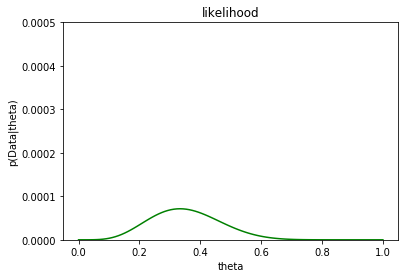

In [7]:
# scipy stats package does not allow for plotting pdf-theta so we need to define formula directly.
def likelihood(D, p):
    N = D.size; suc = D.sum()
    theta = np.linspace(0,1,100)
    return p**suc * (1-p)**(N-suc) # note that we neglected the constant as it will be canceled out in appling Bayes Rule

plt.plot(theta, likelihood(data, theta), color='g')
plt.title("likelihood")
plt.xlabel("theta")
plt.ylabel("p(Data|theta)")
plt.ylim(0,0.0005)

likelihood func.을 P(X|theta=p)=p^x*(1-p)^(n-x) / N=D.size 즉 표본 갯수 / x=suc=D.sum() -> 성공=1,실패=0이므로 이것의 합은 성공 횟수가 됨 / 이제 전제는 모두 정했고, def할 함수를 적으면, p**suc*(1-p)**(N-suc) / plt.ylim(0, 0.0005) -> y의 수치를 0부터 0.0005까지 잘라서 나타냄

이제 베이즈 정리를 이용해서 앞의 prior belief와 likelihood 를 곱하면 posterior belief의 분포를 구할 수 있음

Text(0, 0.5, 'p(theta)')

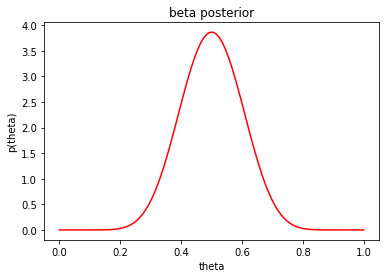

In [8]:
# Belief update
a_pos = a + data.sum()
b_pos = b + data.size - data.sum()

posterior = beta(a_pos, b_pos)
theta = np.linspace(0,1,100)
plt.plot(theta, posterior.pdf(theta), color='r')
plt.title('beta posterior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

1,2열: 공식에 의해 어떤 변환을 가해 베이즈 정리를 만족하도록 새로운 베타분포(posterior)의 모수를 지정 

# HW1 Case 2: Gaussian(prior)-Gaussian(likelihood) (for unknown mean, known precision)

In [9]:
from scipy.stats import norm

## Sampling Density

In [10]:
#population parameter
N2=100
mu=0; s=0.01
data2=norm.rvs(loc=mu, scale=s**0.5, size=N2)
np.random.seed(103)
print(data2)
print(data2.size)
print(data2.sum())

[-1.681e-02 -1.081e-02  1.511e-01  6.835e-02  9.399e-02 -1.135e-01
 -6.358e-02  2.516e-03 -2.731e-02 -3.159e-02  8.583e-04  2.053e-02
  1.589e-01  5.332e-02  8.573e-02  8.708e-03 -3.975e-02  1.262e-01
  4.333e-02 -1.366e-02  8.821e-02 -3.778e-02  1.466e-02  1.269e-01
  3.079e-02 -6.068e-02  9.193e-02 -1.196e-01  5.089e-02 -8.484e-02
  2.011e-01 -1.376e-02 -5.983e-02  2.823e-03  3.927e-02 -1.442e-01
  3.228e-05 -1.050e-01 -2.299e-02 -1.284e-01 -2.711e-01 -1.522e-01
 -1.416e-01  1.109e-01  1.131e-01  4.986e-02  1.179e-01  1.323e-01
  1.852e-01 -8.922e-02  6.169e-02 -1.122e-01  1.652e-01  1.969e-02
  1.032e-02 -1.474e-02  1.131e-01  1.086e-01  4.495e-02 -2.963e-04
 -6.482e-02 -9.561e-02  1.610e-01  1.320e-01 -3.637e-02  1.082e-01
  1.776e-01  4.357e-02  1.195e-01  1.077e-01 -9.818e-02 -1.765e-01
 -7.584e-02 -4.547e-02  1.298e-01 -8.254e-02  2.519e-02  5.188e-02
  5.880e-02 -1.482e-02 -8.767e-02  7.928e-02  5.391e-02  6.698e-02
 -1.270e-01 -4.462e-02  7.795e-02  4.799e-02 -9.607e-02 -2.002

## Prior Belief

Text(0, 0.5, 'p(theta)')

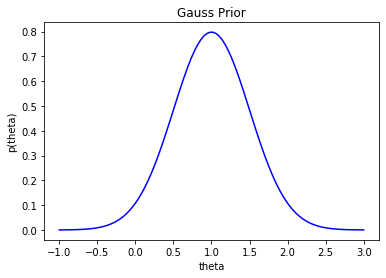

In [11]:
mu0=1; s0=1/4
lamda0=4 #prior 분산의 역수 (람다0)
prior=norm(loc=mu0, scale=(s0)**0.5)
theta=np.linspace(-1,3,100)
plt.plot(theta, prior.pdf(theta), color='b')
plt.title('Gauss Prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

## Likelihood

(-0.5, 0.5)

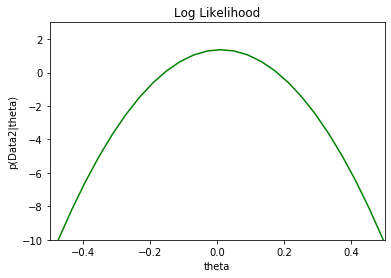

In [12]:

def likelihood(D,X):
    mu=np.mean(D); s=np.std(D)
    theta=np.linspace(-1,3,100)
    return np.log((2*np.pi*s**2)**(-0.5)*np.exp(-(2*s**2)**(-1)*(X-mu)**2))

plt.plot(theta, likelihood(data2, theta), color='g')
plt.title('Log Likelihood')
plt.xlabel('theta')
plt.ylabel('p(Data2|theta)')
plt.ylim(-10,3)
plt.xlim(-0.5,0.5)

## Posterior: Updated Belief

In [13]:
muML=np.mean(data2)
lamdaML=np.std(data2)**-2
print(muML)
print(lamdaML)
print(lamda0)
print(mu0)

0.010968352028819744
96.56171472098487
4
1


In [14]:
muN=lamda0*mu0/(lamda0+lamdaML)+lamdaML*muML/(lamda0+lamdaML)
lamdaN=lamda0+lamdaML
print(muN); print(lamdaN)

0.050308637771373524
100.56171472098487


(-0.5, 0.5)

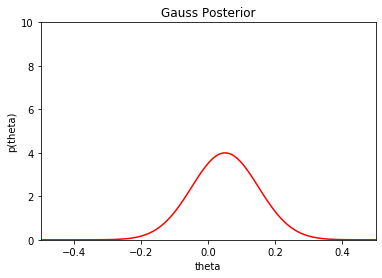

In [15]:
posterior=norm(loc=muN, scale=lamdaN**(-0.5))
thetaN=np.linspace(-0.5,0.5,100)
plt.plot(thetaN, posterior.pdf(thetaN), color='r')
plt.title('Gauss Posterior')
plt.xlabel('theta')
plt.ylabel('p(theta)')
plt.ylim(0,10)
plt.xlim(-0.5,0.5)

In [51]:
#posterior 모수 변환 에서는 ppt p.29 참조

[Text(0.5, 0, 'theta'), Text(0.5, 1.0, 'Posterior')]

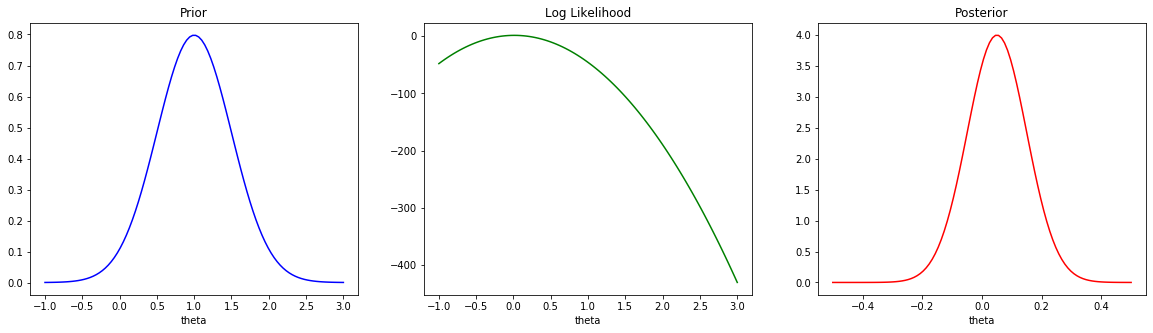

In [16]:
fig = plt.figure(figsize = (20,5))

ax1 = fig.add_subplot(131)
ax1.plot(theta, prior.pdf(theta), color= 'b')
ax1.set(title="Prior", xlabel="theta")

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data2, theta), color= 'g')
ax2.set(title= "Log Likelihood", xlabel= "theta")

ax3 = fig.add_subplot(133)
ax3.plot(thetaN, posterior.pdf(thetaN), color= 'r')
ax3.set(title="Posterior", xlabel ="theta")

# HW2: Polynomial Regression

In [17]:
import numpy as np 
np.set_printoptions(precision=3)
import pandas as pd 
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

## Data Info.

In [18]:
# Importing the dataset
bike = pd.read_csv('day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254,0.227,0.653,0.350,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253,0.255,0.590,0.155,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253,0.242,0.753,0.124,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.256,0.232,0.483,0.351,364,1432,1796


In [19]:
bike.info() # No NA value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [20]:
Data = bike[['cnt', 'temp']]
Data.describe()

,cnt,temp
count,731.000,731.000
mean,4504.349,0.495
std,1937.211,0.183
min,22.000,0.059
25%,3152.000,0.337
50%,4548.000,0.498
75%,5956.000,0.655
max,8714.000,0.862


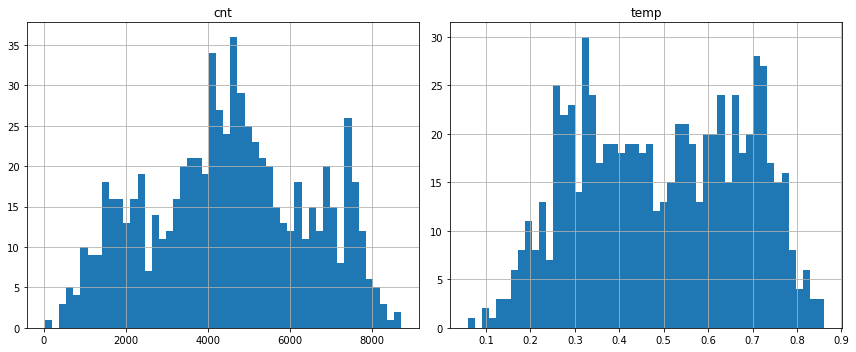

In [21]:
Data.hist(bins=50, figsize=(12, 5))
plt.tight_layout()

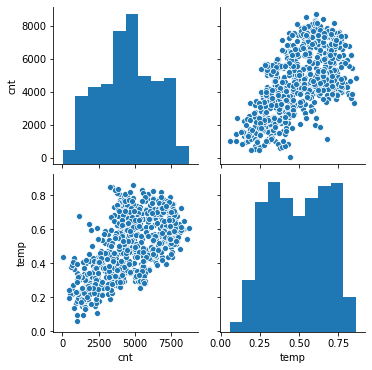

In [22]:
sns.pairplot(Data)

## Polynomial Regression

In [23]:
data = Data.sample(n=40).reset_index()

## 1) Splitting Data

In [24]:
N= data.shape[0]
test = np.random.choice(np.arange(N),20, replace=False)
train_df = data[~data.index.isin(test)].copy()
test_df = data[data.index.isin(test)].copy()
print(train_df.shape, test_df.shape)

(20, 3) (20, 3)


In [25]:
y = np.matrix(data['cnt']).T
X = np.matrix(data['temp']).T
y_train = np.matrix(train_df['cnt']).T
X_train = np.matrix(train_df['temp']).T
y_test = np.matrix(test_df['cnt']).T
X_test = np.matrix(test_df['temp']).T
print(y_train.shape, y_test.shape)

(20, 1) (20, 1)


## 2) Design Matrix & Regression Fitting

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [27]:
for i in range(1, 13):
    poly_i = PolynomialFeatures(degree=i)
    X_train_poly_i = poly_i.fit_transform(X_train)
    X_test_poly_i = poly_i.fit_transform(X_test)
    lin_i = LinearRegression(fit_intercept=False)
    lin_i.fit(X_train_poly_i, y_train)
    err_train_i = y_train - np.dot(np.matrix(X_train_poly_i), np.matrix(lin_i.coef_).T)
    err_test_i = y_test - np.dot(np.matrix(X_test_poly_i), np.matrix(lin_i.coef_).T)
    MSE_train_i = np.log(np.dot(err_train_i.T, err_train_i)/20)
    MSE_test_i = np.log(np.dot(err_test_i.T, err_test_i)/20)
    print(MSE_train_i, MSE_test_i)

[[14.494]] [[14.692]]
[[14.134]] [[14.912]]
[[14.049]] [[15.17]]
[[13.843]] [[15.096]]
[[13.736]] [[15.228]]
[[13.734]] [[15.146]]
[[13.68]] [[16.403]]
[[13.664]] [[15.014]]
[[13.656]] [[17.242]]
[[13.622]] [[21.331]]
[[13.556]] [[22.873]]
[[13.533]] [[23.896]]


In [28]:
MSE_train = np.linspace(0,0,12)
MSE_test = np.linspace(0,0,12)
for i in range(1, 13):
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    lin = LinearRegression(fit_intercept=False)
    lin.fit(X_train_poly, y_train)
    err_train = y_train - np.dot(np.matrix(X_train_poly), np.matrix(lin.coef_).T)
    err_test = y_test - np.dot(np.matrix(X_test_poly), np.matrix(lin.coef_).T)
    MSE_train[i-1] = np.log(np.dot(err_train.T, err_train)/20)
    MSE_test[i-1] = np.log(np.dot(err_test.T, err_test)/20)

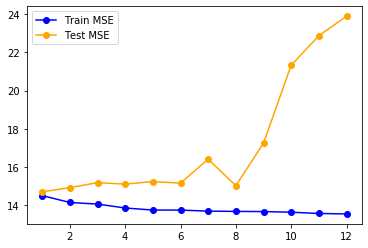

In [29]:
x=range(1,13)
plt.plot(x, MSE_train, 'o-', color='blue', label = 'Train MSE')
plt.plot(x, MSE_test, 'o-' ,color='orange', label = 'Test MSE')
plt.legend()